<a href="https://colab.research.google.com/github/GUILLENJV/Optimizaci-n-de-Campa-as/blob/master/D_TG_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos según los mejores hierparametros

In [ ]:
from numpy import unique
import numpy
from numpy import array
import pandas as pd
#import datetime
#from time import sleep
#from tqdm import tqdm
#import os
from pandas import read_csv
#import json
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils
#import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l1, l2
from tensorflow.keras.layers import Dense, Dropout, Flatten
#from tensorflow.keras.callbacks import EarlyStopping
#############################################
from tensorflow.keras import regularizers
#from predict import model
#from sklearn import preprocessing
#from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
####################################################
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import seaborn as sns
####################################################
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# example of ordinal encoding for a neural network
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Incrustación (Embedding)

In [ ]:
# example of learned embedding encoding for a neural network
from numpy import unique
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, Embedding, Dense, Dropout, Activation
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
#from keras.layers.merge import concatenate
from tensorflow.keras.layers import Concatenate
#from keras.utils import plot_model
#from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/50
80/80 - 11s - loss: 0.4722 - accuracy: 0.8575 - val_loss: 0.1779 - val_accuracy: 0.9421 - 11s/epoch - 141ms/step
Epoch 2/50
80/80 - 1s - loss: 0.1181 - accuracy: 0.9578 - val_loss: 0.0897 - val_accuracy: 0.9613 - 784ms/epoch - 10ms/step
Epoch 3/50
80/80 - 1s - loss: 0.0837 - accuracy: 0.9627 - val_loss: 0.0766 - val_accuracy: 0.9657 - 705ms/epoch - 9ms/step
Epoch 4/50
80/80 - 1s - loss: 0.0750 - accuracy: 0.9660 - val_loss: 0.0716 - val_accuracy: 0.9673 - 628ms/epoch - 8ms/step
Epoch 5/50
80/80 - 1s - loss: 0.0709 - accuracy: 0.9670 - val_loss: 0.0691 - val_accuracy: 0.9677 - 835ms/epoch - 10ms/step
Epoch 6/50
80/80 - 1s - loss: 0.0685 - accuracy: 0.9678 - val_loss: 0.0676 - val_accuracy: 0.9682 - 750ms/epoch - 9ms/step
Epoch 7/50
80/80 - 1s - loss: 0.0668 - accuracy: 0.9686 - val_loss: 0.0668 - val_accuracy: 0.9680 - 1s/epoch - 13ms/step
Epoch 8/50
80/80 - 1s - loss: 0.0656 - accuracy: 0.9687 - val_loss: 0.0663 - val_accuracy: 0.9687 - 717ms/epoch - 9ms/step
Epoch 9/50
80/8

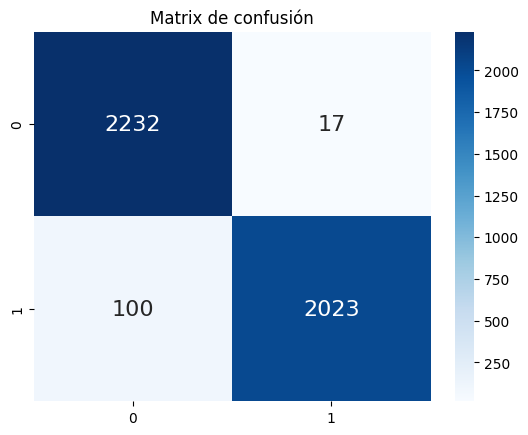

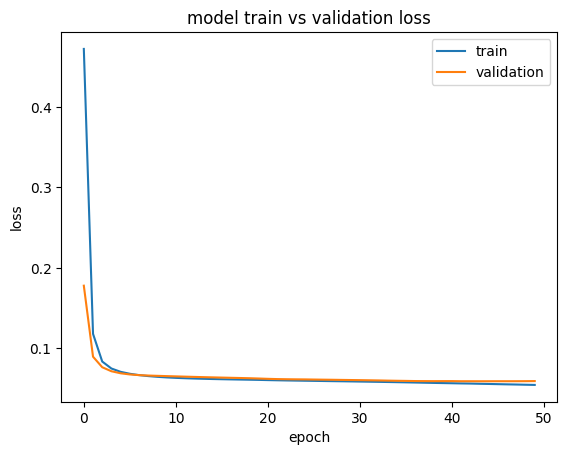

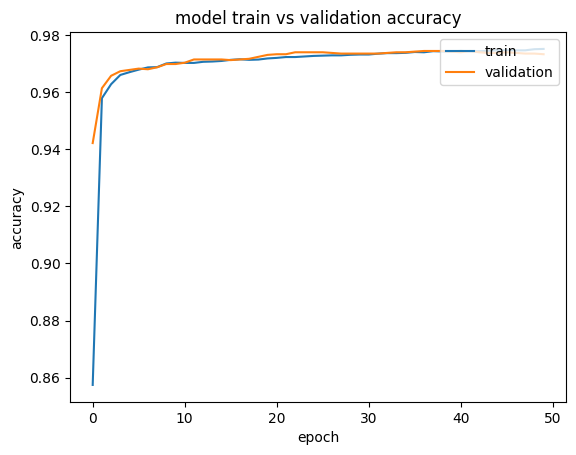

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2249
           1       0.99      0.95      0.97      2123

    accuracy                           0.97      4372
   macro avg       0.97      0.97      0.97      4372
weighted avg       0.97      0.97      0.97      4372



In [ ]:
df = pd.read_csv("62f1ab79cc287b001f643389_clear_final.csv")
X = df[['campaign_id',
        'traffic_source_id',
        'visitor_device_browser',
        'visitor_device_hardware_family',
        'visitor_device_hardware_model',
        'visitor_device_hardware_vendor',
        'visitor_device_os_family',
        'visitor_device_os_vendor',
        'visitor_device_os_version',
        'visitor_device_type',
        'visitor_geo_location_cityName',
        'visitor_geo_location_connection_typ',
        'visitor_geo_location_countryCode',
        'visitor_geo_location_isp',
        'visitor_geo_location_regionName',
        'visitor_tokens_adh',
        'visitor_tokens_cadid',
        'visitor_tokens_adi',
        'converted_yes',
        'converted_no']]

y = df[["landing_page_id"]]

df = pd.concat([X, y], axis=1)
# retrieve numpy array
df = df.values
# split into input (X) and output (y) variables
X = df[:, :-1]
y = df[:,-1]
# format all fields as string
X = X.astype(str)
# reshape target to be a 2d array
y = y.reshape((len(y), 1))

# prepare input data
def prepare_inputs(X_train, X_test):
    X_train_enc, X_test_enc = list(), list()
    # label encode each column
    for i in range(X_train.shape[1]):
        le = LabelEncoder()
        le.fit(X_train[:, i])
        # encode
        train_enc = le.transform(X_train[:, i])
        test_enc = le.transform(X_test[:, i])
        # store
        X_train_enc.append(train_enc)
        X_test_enc.append(test_enc)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# make output 3d
y_train_enc = y_train_enc.reshape((len(y_train_enc), 1, 1))
y_test_enc = y_test_enc.reshape((len(y_test_enc), 1, 1))
# prepare each input head
in_layers = list()
em_layers = list()
for i in range(len(X_train_enc)):
    # calculate the number of unique inputs
    n_labels = len(unique(X_train_enc[i]))
    # define input layer
    in_layer = Input(shape=(1,))
    # define embedding layer
    em_layer = Embedding(n_labels, 20)(in_layer)
    # store layers
    in_layers.append(in_layer)
    em_layers.append(em_layer)
# concat all embeddings
merge = Concatenate()(em_layers)
# merge = merge.output
dense = Dense(20, activation='relu', kernel_initializer='uniform')(merge)
output = Dense(1, activation='sigmoid')(dense)
model = Model(inputs=in_layers, outputs=output)
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot graph
plot_model(model, show_shapes=True, to_file='embeddings.png')
# fit the keras model on the dataset
history = model.fit(X_train_enc, y_train_enc, epochs=50, batch_size=128, verbose=2, validation_data=(X_test_enc, y_test_enc), shuffle=False)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

# Evaluamos el modelo
scores = model.evaluate(X_train_enc, y_train_enc)

loss, accuracy = model.evaluate(X_train_enc, y_train_enc, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))


# Predicting the Test set results
y_pred = model.predict(X_test_enc)
y_pred = (y_pred > 0.5).astype(int)

print("Forma de y_pred:", y_pred.shape)
print("Valores únicos en y_pred:", np.unique(y_pred))

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_enc.reshape(-1), y_pred.reshape(-1))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
plt.title("Matrix de confusión")
sns.heatmap(matrix,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 16})

plt.show()

from matplotlib import pyplot
from numpy import array

# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# plot train and validation loss
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# Se obtiene las metricas de evaluación del modelo
from sklearn.metrics import classification_report
report = classification_report(y_test_enc.reshape(-1), y_pred.reshape(-1))
print(report)